# Project 1 Data Analysis
## Hypothesis: Students with 'None to less than one month!' of coding experience are more likely to predict their final grade will be a B rather then an A.

### First I will use an extention to automatically reload any changes I make in my data_utils file and establish a constant as a refrence to the data I am using in this analysis.

In [4]:
%reload_ext autoreload
%autoreload 2
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

## Next I will read in the csv file and make it into column oriented data table to make it easier to analyze it's data

In [5]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
columns: dict[str, list[str]] = columnar(data_rows)


## Now, I will select  the grade column and display the first 5 rows.

In [8]:
from data_utils import head, select
from tabulate import tabulate

data_cols_head: dict[str, list[str]] = head(columns, 5)
selected_data: dict[str, list[str]] = select(columns, ["prior_time", "grade"])

tabulate(head(selected_data, 5), selected_data.keys(), "html")

prior_time,grade
1 month or so,A
None to less than one month!,B
None to less than one month!,B
None to less than one month!,A
1 month or so,A


## Now, I will filter the data through a mask.


In [59]:
from data_utils import grade_letter, masked 

grade_a_mask: list[bool] = grade_letter(columns["grade"], "A")
grade_b_mask: list[bool] = grade_letter(columns["grade"], "B")
experience_and_grade_a: list[str] = masked(columns["prior_time"], grade_a_mask)
experience_and_grade_b: list[str] = masked(columns["prior_time"], grade_b_mask)


## Then, I will count how many students with 'None to less than one month!' of experience predicted their final grade would be an A and how many predicted their final grade would be a B.

In [61]:
from data_utils import count

students_a: dict[str, int] = count(experience_and_grade_a)
students_b: dict[str, int] = count(experience_and_grade_b)
print(f"Number of students who predicted their final grade would be an A with 'None to less than one month!' of experience: {students_a['None to less than one month!']}")
print(f"Number of students who predicted their final grade would be an B with 'None to less than one month!' of experience: {students_b['None to less than one month!']}")

Number of students who predicted their final grade would be an A with 'None to less than one month!' of experience: 197
Number of students who predicted their final grade would be an B with 'None to less than one month!' of experience: 189


## Graph and plots of data on the number of students with 'None to less than one month!' and their final grade predictions.

Text(0.5, 0.98, 'Students with less than one month of experience and their final grade prediction')

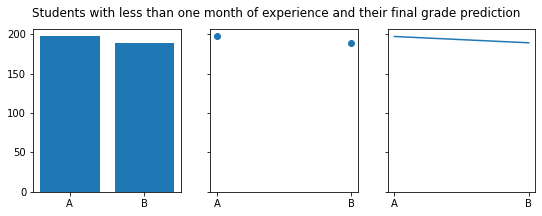

In [65]:
import matplotlib.pyplot as plt

data = {'A': 197, 'B': 189}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Students with less than one month of experience and their final grade prediction')

# Conclusion
## My hypothesis was wrong, there were more students with 'None to less than one month!' of experience that predicted their grade would be an A than a B
### This may be because of the large amounts of support provided in this class, through office hours, tutuoring, and review sessions. Or possibly other class features, like the late point forgiveness, etc.